# UNsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [58]:
import numpy as np
import pandas as pd
#from scipy.stats import boxcox
#from scipy.stats import shapiro
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [59]:
raw_df = pd.read_csv("Wholesale_Data.csv")
df = raw_df.copy()

The dataset columns are:  
* Channel:  dichotomous nominal numerical data representing the type of buyer (hotel, restaurant, cafe - unclear why three examples are offered for 2 possible values)  
* Region: nominal numerical data representing the region, takes on one of three values
* Fresh: continuous numerical representing annual spending on fresh products
* Milk:  continuous numerical representing annual spending on dairy products
* Grocery:  continuous numerical representing annual spending on grocery products  
* Frozen:  continuous numerical representing annual spending on frozen products  
* Detergents_Paper:  continuous numerical representing annual spending on detergent and paper products
* Delicassen[sic]:  continuous numerical representing annual spending on delicatessen products

In [60]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [61]:
df.shape

(440, 8)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [63]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


There are varying ranges on the continuous numerical inputs, though not by magnitudes.  Still, scaling will be required for PCA and Kmeans

In [64]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [65]:
df.duplicated().sum()

0

There are no nulls nor duplicated rows in this dataset.  The int64 seen for each column earlier would indicate there should be no unexpected string data anywhere, or np.nan either (np.nan would force to float).

In [66]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [67]:
x = df.iloc[:,2:]
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [68]:
inputs = x.columns
inputs

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

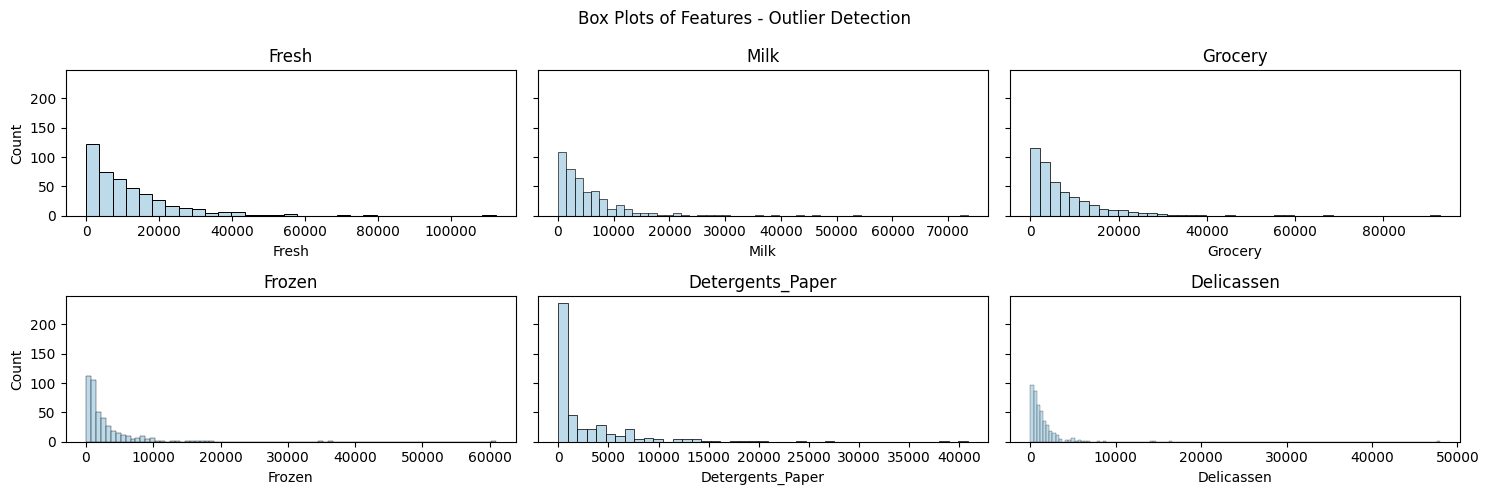

In [69]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Box Plots of Features - Outlier Detection')

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Loop through the features and create boxplots on each subplot
for i, input in enumerate(inputs):
    sns.histplot(x=df[input], ax=axes[i])
    axes[i].set_title(input)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

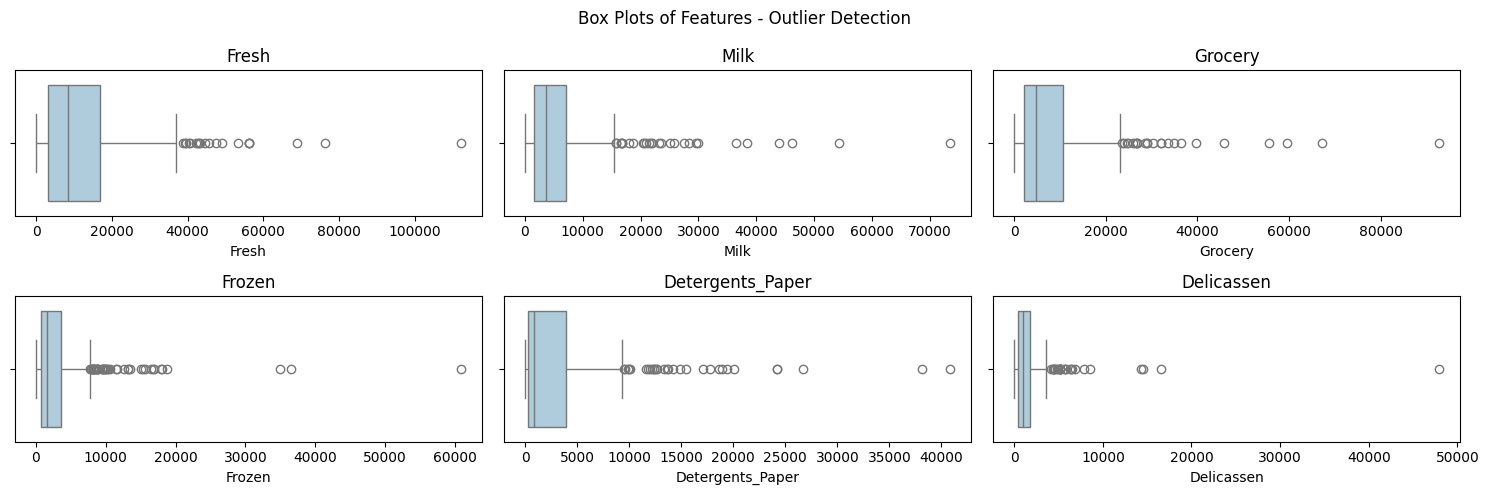

In [70]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Box Plots of Features - Outlier Detection')

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Loop through the features and create boxplots on each subplot
for i, input in enumerate(inputs):
    sns.boxplot(x=df[input], ax=axes[i])
    axes[i].set_title(input)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


Given the boxplots above, this warrants a look at points that are 1.5 times and 3 times the IQR below/above the first and third quartiles.  It's generally accepted practice to remove the points that are 3 times the IQR beyond the outer quartiles, whereas the points between 1.5 and 3 times the IQR beyond the outer quartiles may or may not be removed.  

Further reading:  https://statisticsbyjim.com/basics/outliers/  

In [71]:
# Function to identify outliers based on IQR.  Generates a boolean mask.
def identify_outliers(data, input, multiplier=1.5):
    q1 = data[input].quantile(0.25)
    q3 = data[input].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - multiplier * iqr
    upper_limit = q3 + multiplier * iqr
    outliers = (data[input] < lower_limit) | (data[input] > upper_limit)
    return outliers

# Set the multiplier for identifying outliers (1.5 or 3 times IQR)
multiplier_1 = 1.5
multiplier_3 = 3

# Create empty sets to store indices of outliers
outliers_1_5x = set()
outliers_3x = set()

# Iterate through each feature
for input in inputs:
    # Identify outliers using 1.5 times IQR
    outliers_1_5x |= set(df.index[identify_outliers(df, input, multiplier_1)])   # could this set contain values that also meet the criterion for 3*IQR? (ugh)
    print(f"{input} has minor outliers at row indices: {outliers_1_5x}.")
    
    # Identify outliers using 3 times IQR
    outliers_3x |= set(df.index[identify_outliers(df, input, multiplier_3)])
    print(f"{input} has major outliers at row indices: {outliers_3x}.")

# Combine indices for rows that fall outside 1.5 times IQR and/or 3 times IQR
combined_outliers = outliers_1_5x.union(outliers_3x)

# Convert sets to lists for further use if needed
outliers_1_5x = list(outliers_1_5x)
outliers_3x = list(outliers_3x)
combined_outliers = list(combined_outliers)

# Display or use the outlier indices as needed
print(" ")
print("Outliers (1.5x IQR):", outliers_1_5x)
print("Outliers (3x IQR):", outliers_3x)
print("Combined Outliers:", combined_outliers)

Fresh has minor outliers at row indices: {129, 258, 259, 87, 282, 284, 285, 29, 289, 39, 103, 47, 176, 239, 370, 52, 181, 436, 377, 125}.
Fresh has major outliers at row indices: {284, 125, 181}.
Milk has minor outliers at row indices: {384, 129, 258, 259, 265, 23, 282, 284, 285, 29, 28, 289, 163, 38, 39, 171, 427, 45, 47, 176, 49, 52, 181, 436, 309, 183, 56, 61, 319, 65, 325, 211, 85, 86, 87, 216, 92, 358, 103, 109, 239, 370, 377, 251, 125, 254}.
Milk has major outliers at row indices: {171, 47, 92, 211, 23, 181, 85, 86, 56, 61, 284, 125, 183, 319}.
Grocery has minor outliers at row indices: {384, 129, 258, 259, 265, 145, 23, 282, 284, 285, 29, 28, 289, 163, 38, 39, 171, 427, 45, 43, 47, 176, 49, 304, 52, 181, 436, 309, 183, 56, 437, 61, 319, 65, 325, 201, 331, 77, 205, 333, 211, 85, 86, 87, 216, 343, 92, 358, 103, 109, 239, 370, 377, 251, 125, 254}.
Grocery has major outliers at row indices: {65, 333, 211, 85, 86, 23, 216, 92, 284, 171, 47, 181, 125, 183, 56, 61, 319}.
Frozen has min

Removing only the major outliers.  Let's see how many rows this is.

In [72]:
# Drop rows with outliers from the dataframe - Major outliers only
df_3xout = df.drop(index=outliers_3x)
df_3xout = df_3xout.reset_index(drop=True)

In [73]:
df_3xout.shape

(402, 8)

Removing the major (3x) outliers removed 38 rows from the dataset.  Let's review the plots now.

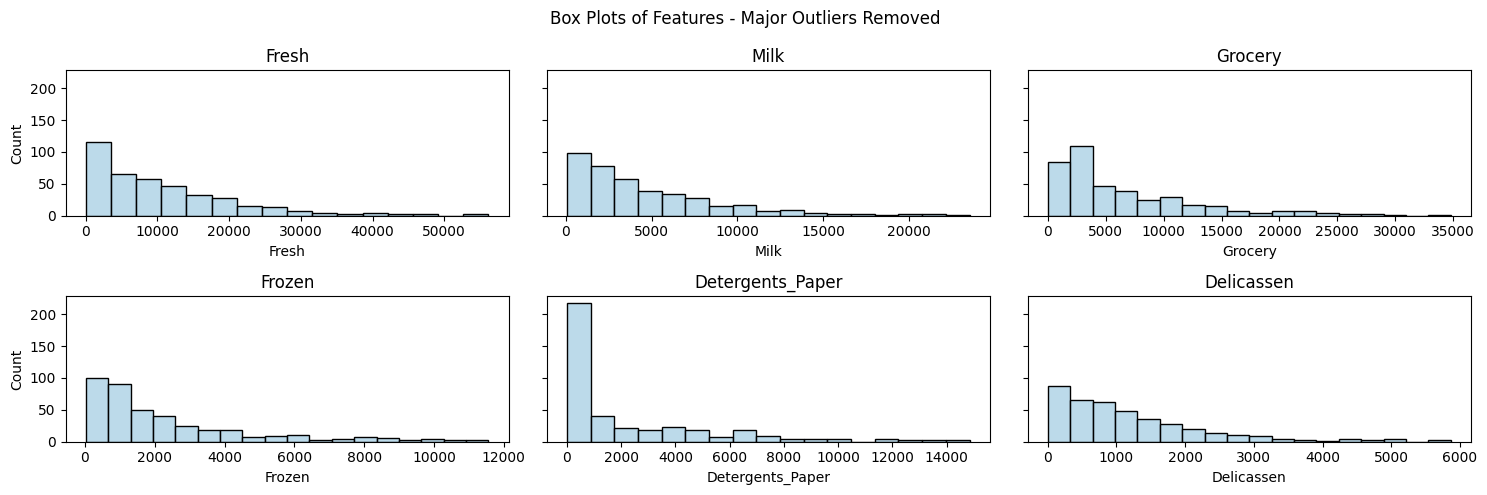

In [74]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Box Plots of Features - Major Outliers Removed')

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Loop through the features and create boxplots on each subplot
for i, input in enumerate(inputs):
    sns.histplot(x=df_3xout[input], ax=axes[i])
    axes[i].set_title(input)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

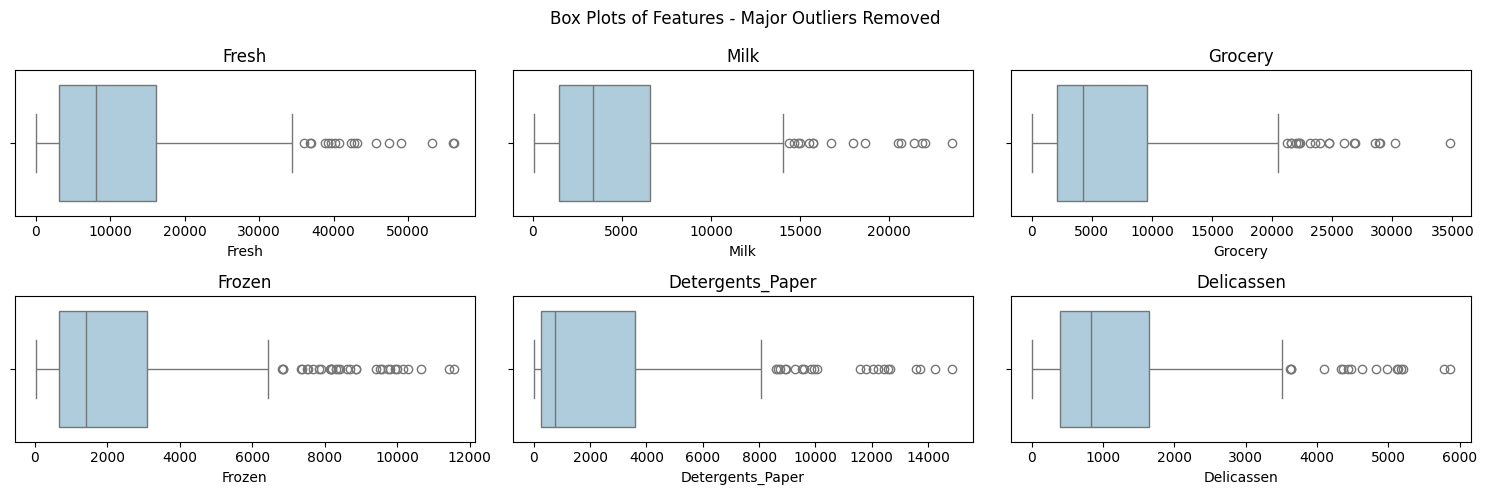

In [75]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Box Plots of Features - Major Outliers Removed')

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Loop through the features and create boxplots on each subplot
for i, input in enumerate(inputs):
    sns.boxplot(x=df_3xout[input], ax=axes[i])
    axes[i].set_title(input)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


I'd say that cleaned things up a fair bit.  Let's have a look at scatterplots for each pairing.

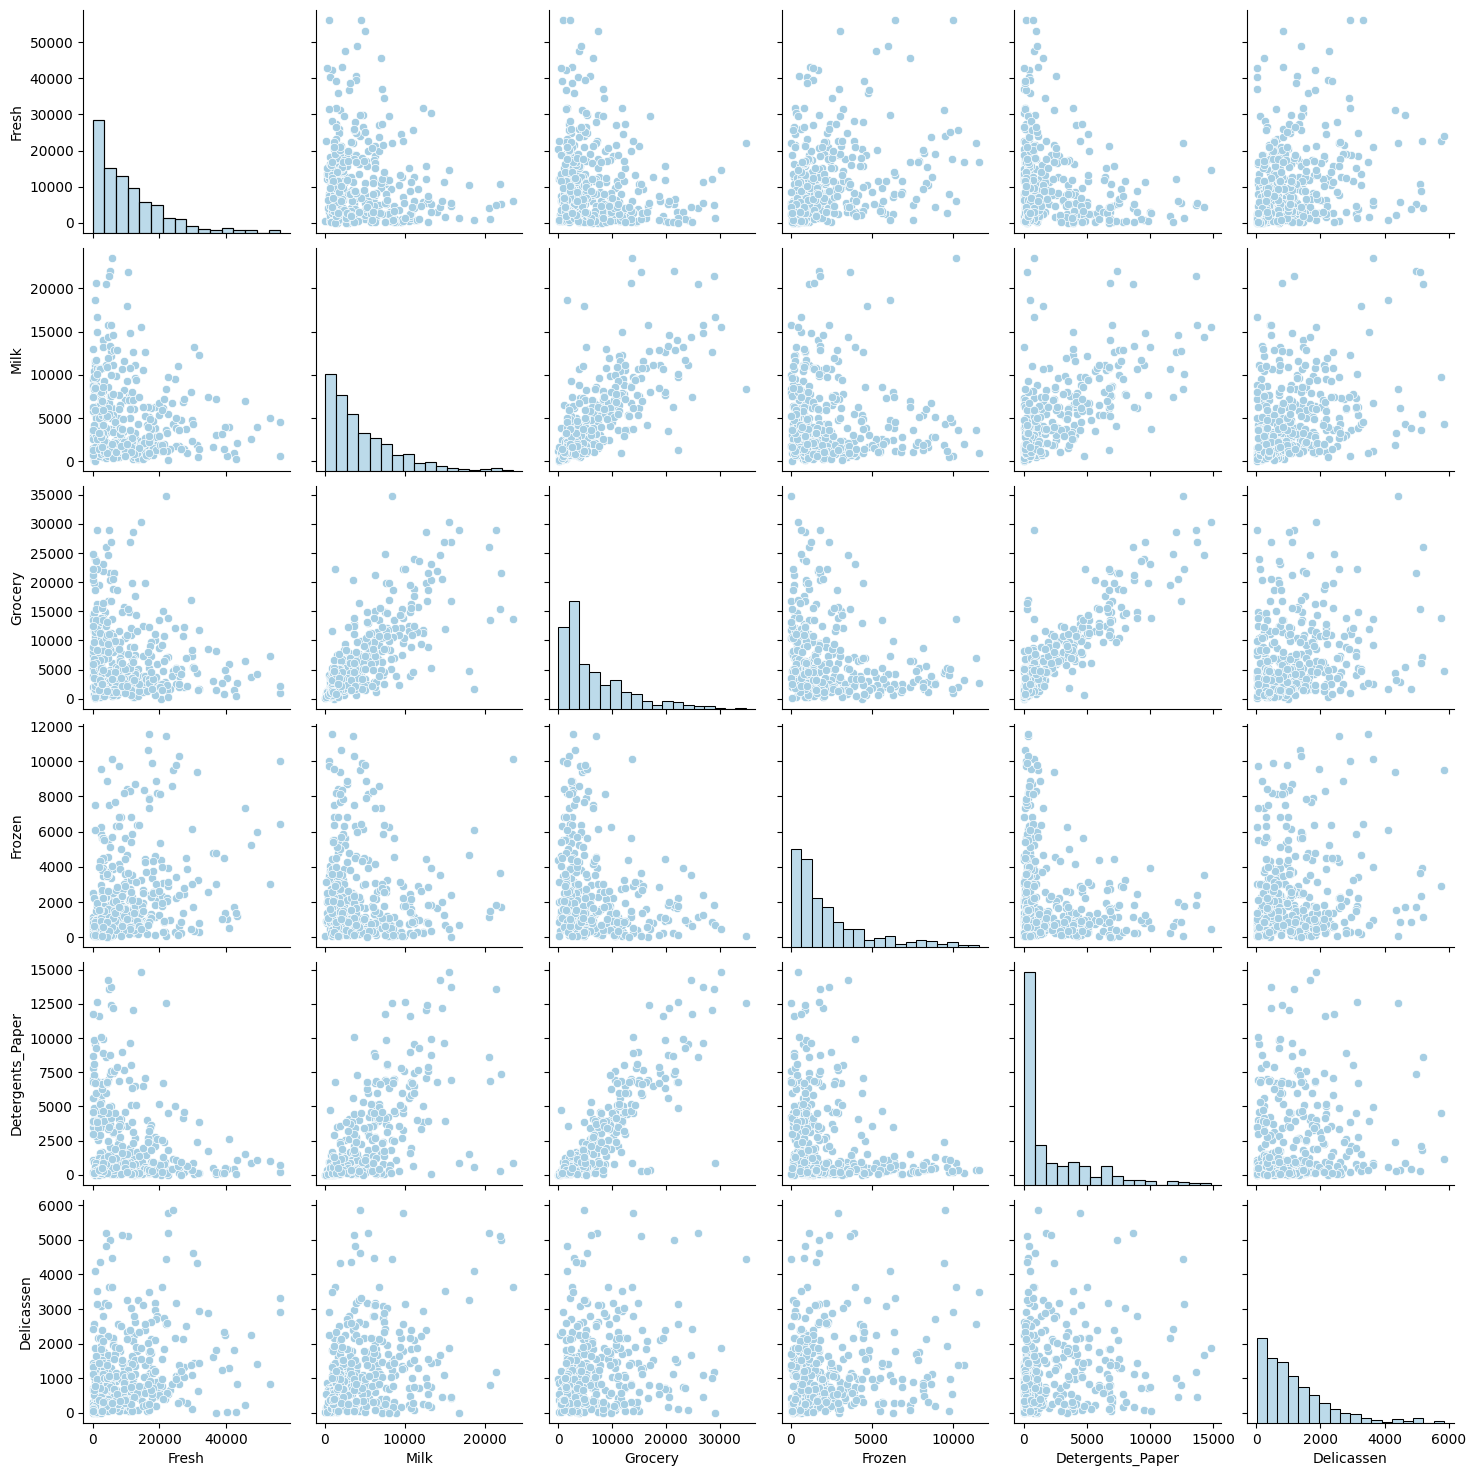

In [76]:
# Create the default pairplot
sns.pairplot(df_3xout[inputs])

There seems to be a bit more a visible linear (slightly fanned) relationship between Grocery and Milk, as well as Grocery and Detergents_Paper.  
Now let's look at correlations using a heatmap.

What if we hue on Region, then Channel?

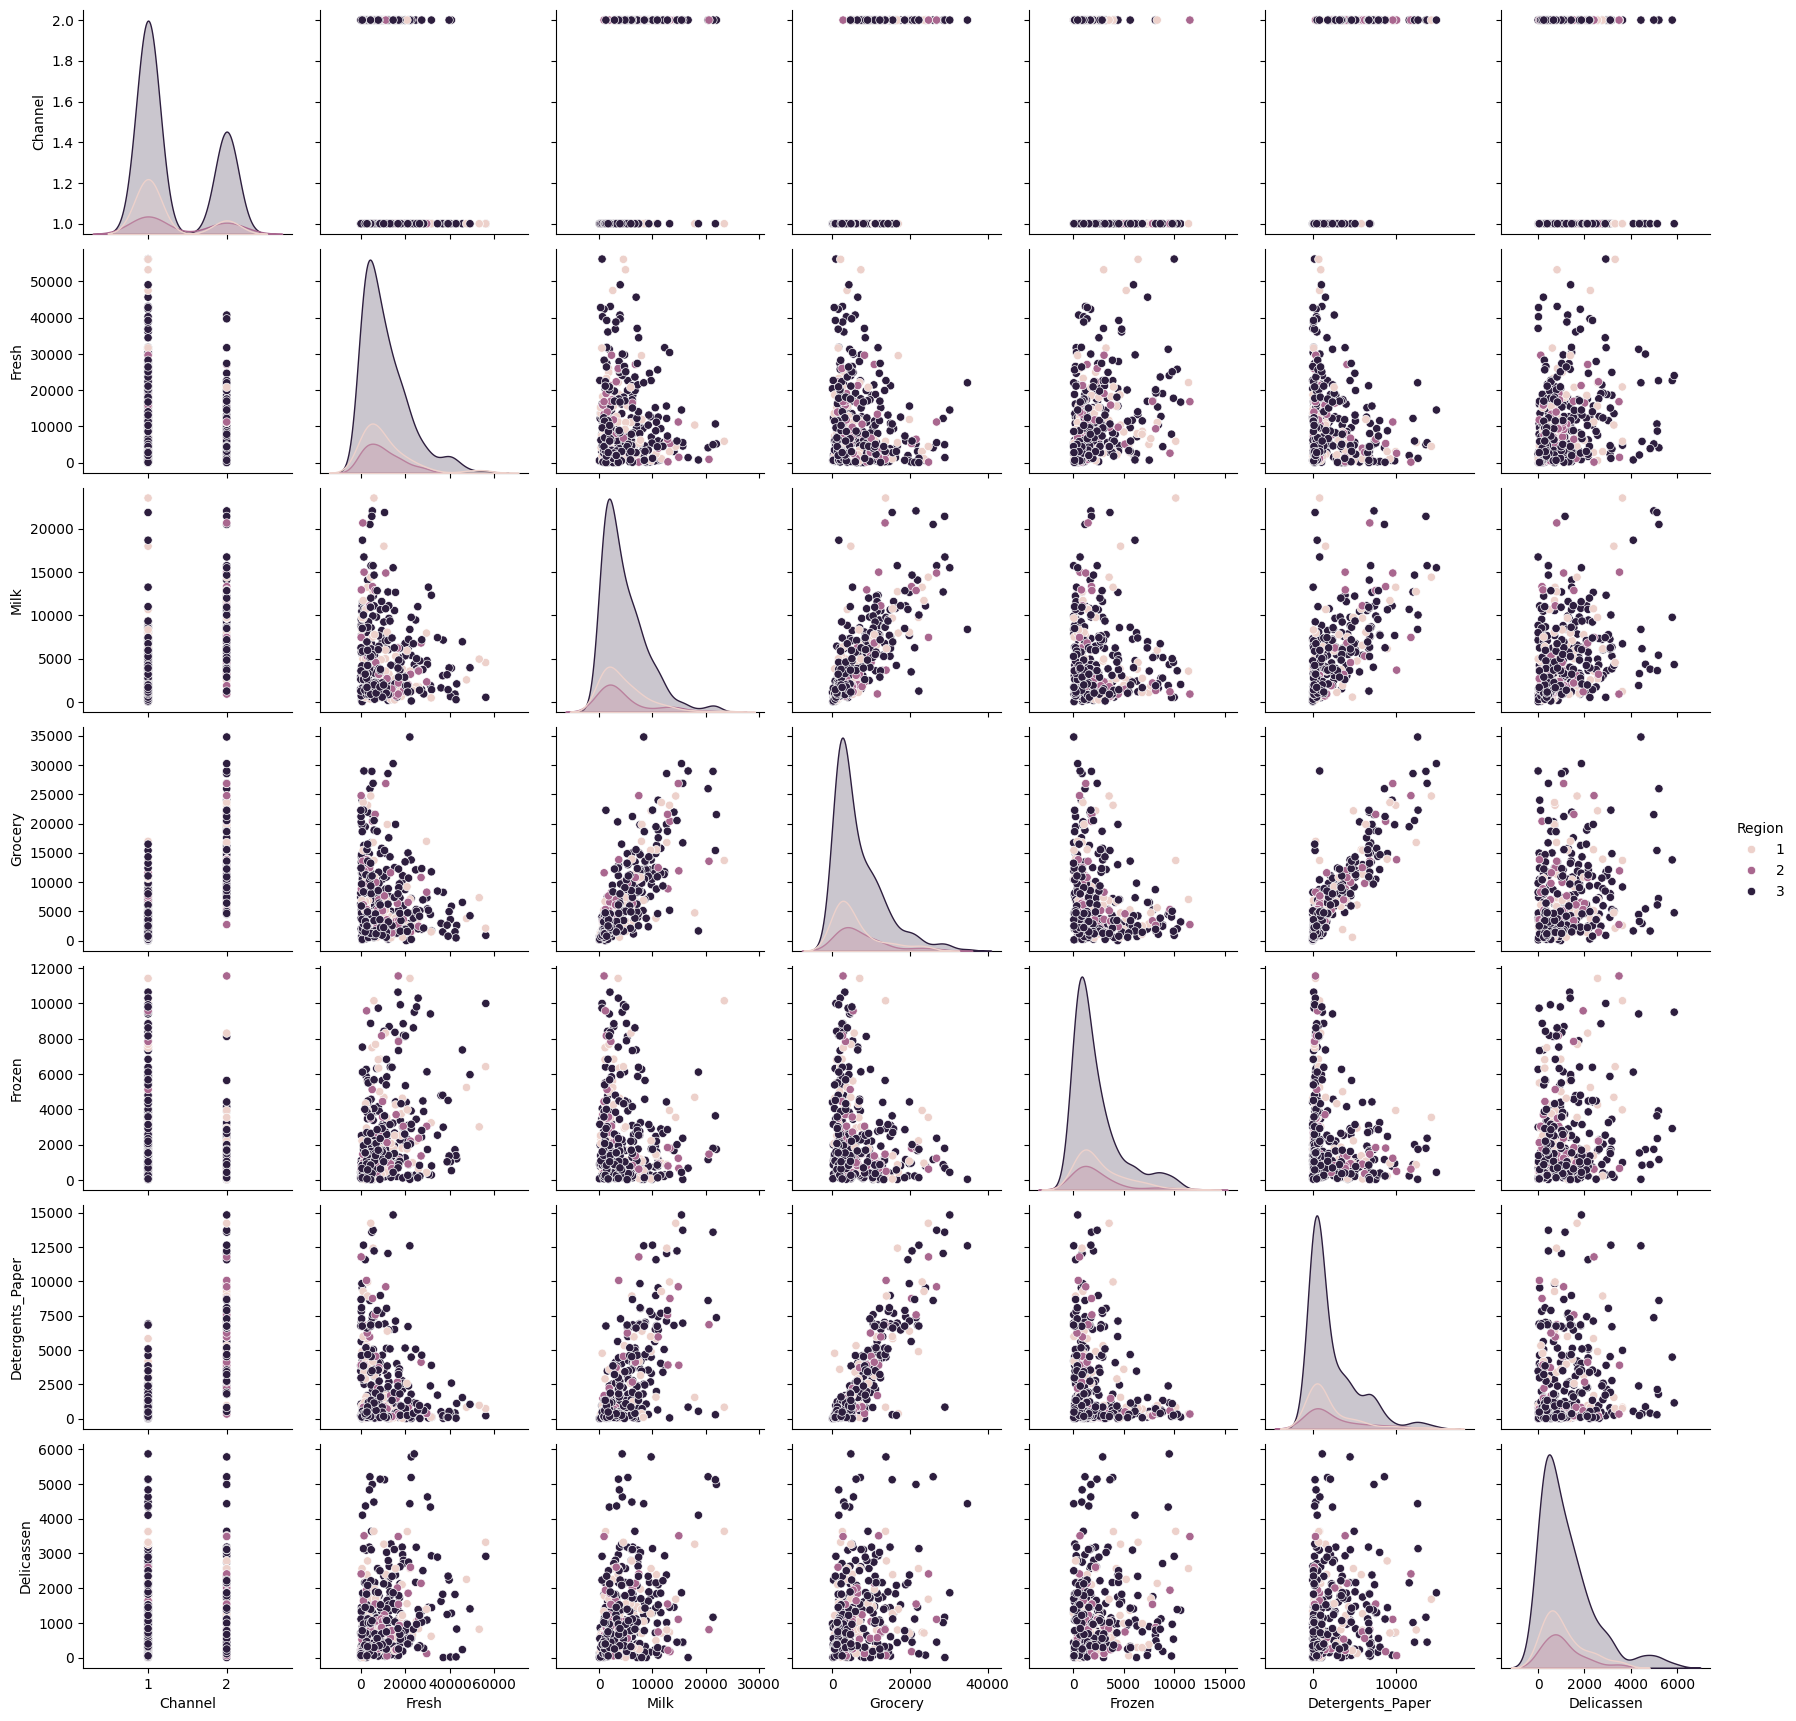

In [77]:
sns.set_palette("Paired") # nothing seems to work... I can't see one of the 3 colours, it's too pale
sns.pairplot(data=df_3xout, hue = 'Region')

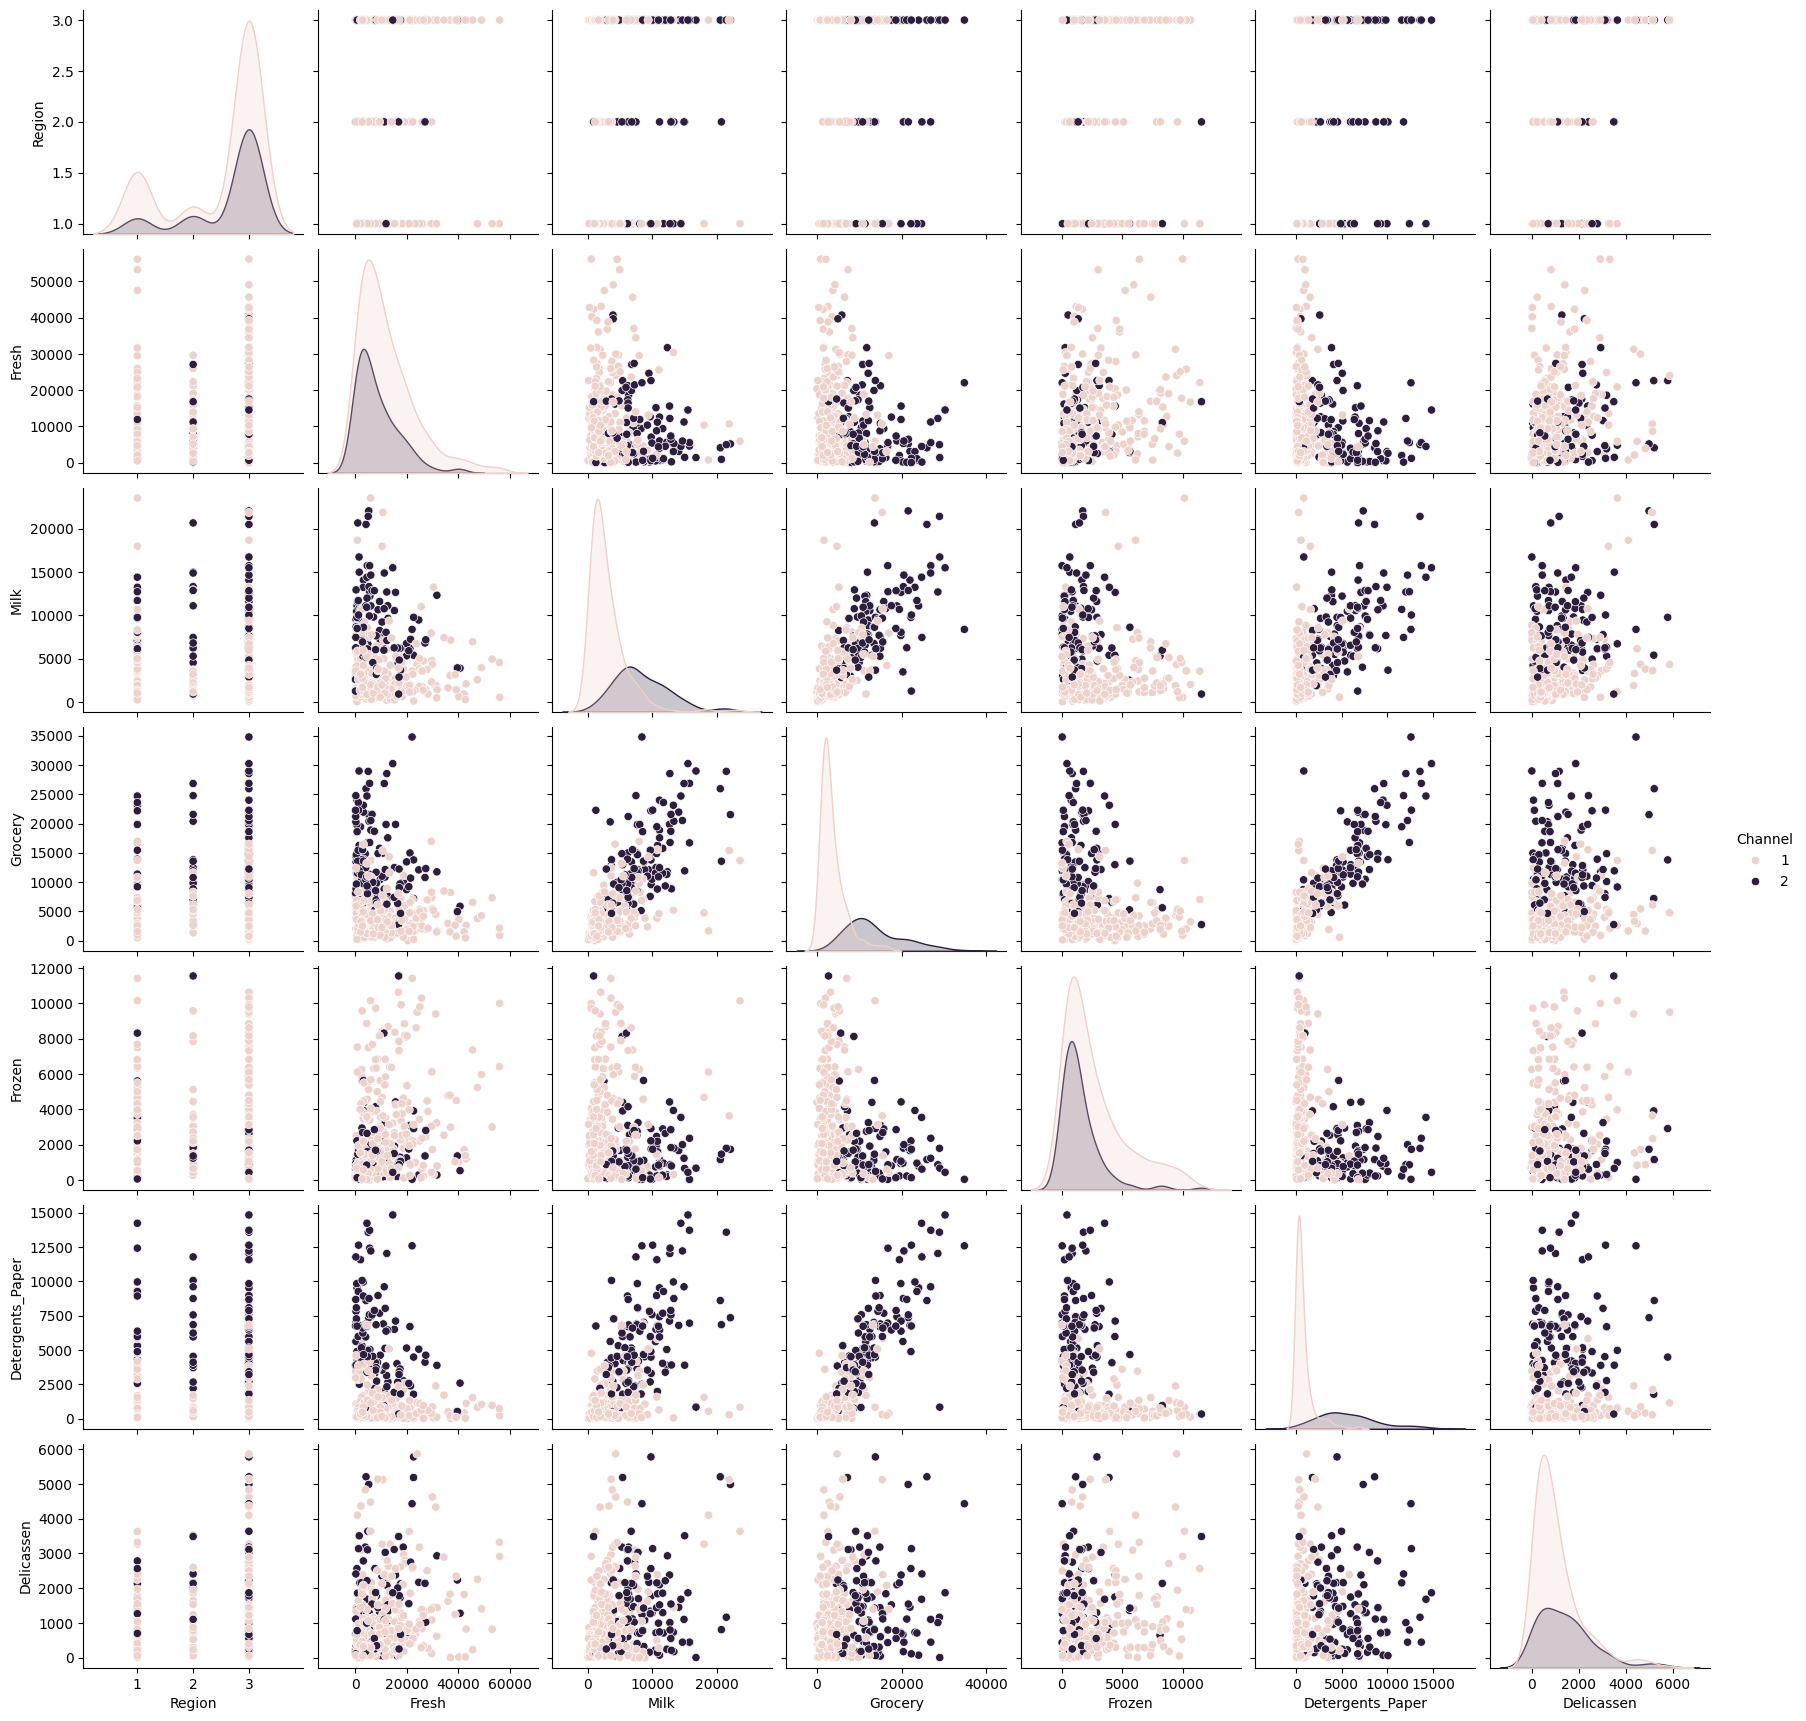

In [78]:
sns.pairplot(data=df_3xout, hue = 'Channel')

<Axes: >

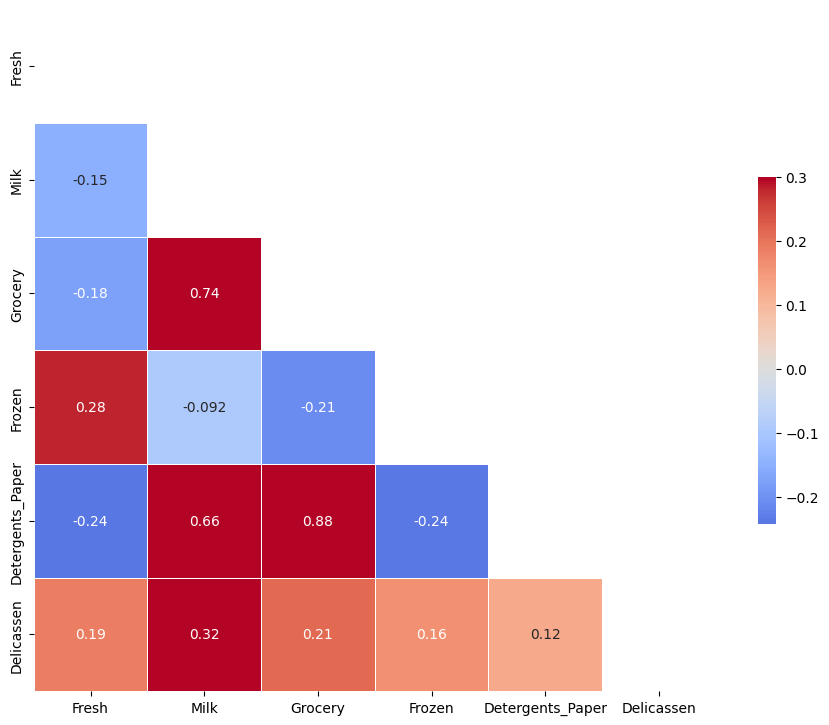

In [79]:
# Compute the correlation matrix
corr = df_3xout[inputs].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,annot=True, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Some strong correlations (anything 0.7 or higher).  Grocery and Milk are correlated, with a value of 0.74, and Detergents_Paper and Grocery are fairly highly correlated at 0.88.  Let's have the correlation values and p-value printed out.

In [80]:
columns = df_3xout[inputs].columns

# Iterate through all pairs of columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        variable1 = columns[i]
        variable2 = columns[j]

        # Calculate Pearson correlation coefficient and p-value
        corr_coef, p_value = pearsonr(df_3xout[variable1], df_3xout[variable2])

        # Check significance level
        if p_value < 0.05:
            print(f"{variable1} and {variable2} are possibly correlated. (Pearson's r = {corr_coef}, p-value = {p_value})")


Fresh and Milk are possibly correlated. (Pearson's r = -0.15155371923832586, p-value = 0.0023129307671416795)
Fresh and Grocery are possibly correlated. (Pearson's r = -0.1777246559494889, p-value = 0.0003425186346140109)
Fresh and Frozen are possibly correlated. (Pearson's r = 0.28289907837284217, p-value = 7.796911488453692e-09)
Fresh and Detergents_Paper are possibly correlated. (Pearson's r = -0.2412703775757996, p-value = 9.836024488226583e-07)
Fresh and Delicassen are possibly correlated. (Pearson's r = 0.1861170978815976, p-value = 0.00017483060484800198)
Milk and Grocery are possibly correlated. (Pearson's r = 0.7416247886042603, p-value = 2.347812503086759e-71)
Milk and Detergents_Paper are possibly correlated. (Pearson's r = 0.6554793682855468, p-value = 1.0243741083131255e-50)
Milk and Delicassen are possibly correlated. (Pearson's r = 0.31911068643883006, p-value = 5.7436911988811444e-11)
Grocery and Frozen are possibly correlated. (Pearson's r = -0.2087583198874953, p-valu

Admittedly I'm not sure if I think every single pairing is correlated.  Values below 0.4 (in absolute terms) start being of less concern.

## Scaling

Now we'll scale the data for PCA and Kmeans.

In [81]:
X = df_3xout[inputs]
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

You lose column headers when you use StandardScaler.  Let's put the column names back in.

In [82]:
X_scaled

,0,1,2,3,4,5
0,0.157530,1.150833,0.143097,-0.874394,0.128160,0.131036
1,-0.379366,1.186704,0.459475,-0.242005,0.332651,0.529542
2,0.214549,-0.819709,-0.383411,1.654343,-0.587723,0.540460
3,1.109056,0.161835,0.085875,0.637538,-0.168170,3.631153
4,-0.153969,0.825438,-0.240750,-0.689743,-0.162223,0.233847
...,...,...,...,...,...,...
397,0.546139,-0.184757,0.211354,-0.680755,0.028062,-0.323879
398,2.698409,-0.764972,-0.928363,0.880607,-0.724490,1.048145
399,0.335666,2.509250,3.718625,-0.783294,4.147611,0.612336
400,-0.070067,-0.636864,-0.696952,-0.537773,-0.699714,0.847072


In [83]:
print(X_scaled.columns)

RangeIndex(start=0, stop=6, step=1)


In [84]:
X_scaled.columns = X.columns
print(X_scaled.columns)


Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')


In [85]:
X_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.157530,1.150833,0.143097,-0.874394,0.128160,0.131036
1,-0.379366,1.186704,0.459475,-0.242005,0.332651,0.529542
2,0.214549,-0.819709,-0.383411,1.654343,-0.587723,0.540460
3,1.109056,0.161835,0.085875,0.637538,-0.168170,3.631153
4,-0.153969,0.825438,-0.240750,-0.689743,-0.162223,0.233847
...,...,...,...,...,...,...
397,0.546139,-0.184757,0.211354,-0.680755,0.028062,-0.323879
398,2.698409,-0.764972,-0.928363,0.880607,-0.724490,1.048145
399,0.335666,2.509250,3.718625,-0.783294,4.147611,0.612336
400,-0.070067,-0.636864,-0.696952,-0.537773,-0.699714,0.847072


## Rudimentary Feature Selection Algorithms

The instructions at the beginning of this notebook asked:  
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.  

This seems unclear (and repetitive).  PCA is done further down.  Are we to do PCA up here too?  Or opt for RandomForest to pare down on features?   Or SelectKBest?  

If RandomForest or SelectKBest are chosen, the target has to be identified, and its values may need preprocessing.  This is where it gets iffy.  What was the original intent for this dataset?  Predict Channel by amounts spent on the goods in the other columns (including Region or no)?  

For SelectKBest:  https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html  

I had a conversation with a mentor about this, who also found the dataset a bit cryptic.  All the same, based on the value counts below, I'll set Channel to y (predicted variable), as it's basically just a binary classification problem then.  Region would require a bit of a different set-up as it would be multiclass classification (albeit with a heavy lean on class 3, given the value counts).  

Train_test_split won't be used here as we're just doing a "quick & dirty" feature selection exercise using the RandomForest Classifier to see which features contribute the most information from a predictive standpoint.  

In [86]:
print(df_3xout['Channel'].value_counts())
print(df_3xout['Region'].value_counts())

Channel
1    278
2    124
Name: count, dtype: int64
Region
3    290
1     71
2     41
Name: count, dtype: int64


Don't know if this is required, but I'll replace 2 with 0 to make this a "classic binary classification" set-up by keeping to 0 and 1 instead of 1 and 2.  Then I'll check that it worked.

In [87]:
df_3xout['Channel'].replace(2, 0, inplace=True)

In [88]:
df_3xout['Channel'].value_counts()

Channel
1    278
0    124
Name: count, dtype: int64

Set y (the predicted variable) to Channel

In [89]:
y = df_3xout['Channel']

### RandomForest as Feature Selector

Instantiate a RandomForestClassifier (rf).  Set up the k-fold crossvalidation, and set up the gridsearch for the best hyperparameters that could be used.

In [90]:
rf = RandomForestClassifier().fit(X_scaled, y)
cross_val_score(rf, X_scaled, y, cv = 5).mean()


0.9229012345679013

Showing the feature importance rankings before gridsearch.

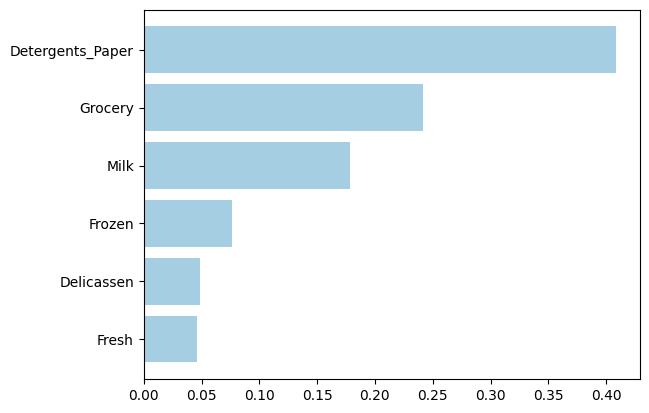

In [91]:
# With help from:  https://www.yourdatateacher.com/2021/10/11/feature-selection-with-random-forest/

f_i = list(zip(X_scaled.columns,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

Now setting up the GridSearch on the random forest classifier.  Display the hyperparameters that came out as the best.  

In [92]:
param_grid = {
    'max_depth': [None, 1, 3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 3, 5, 7, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [93]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.9278395061728395
RandomForestClassifier(min_samples_leaf=2, min_samples_split=5)


Display the most important features after gridsearch.

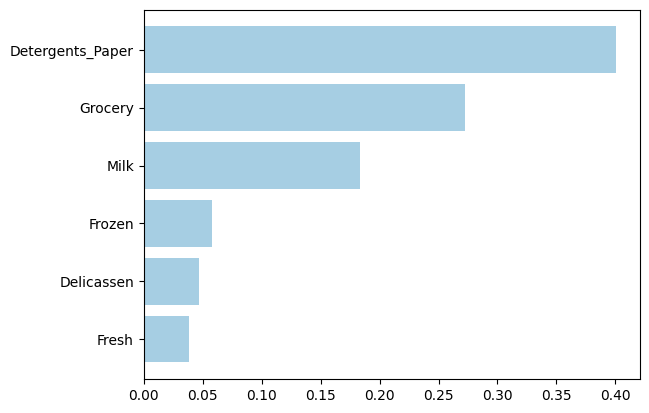

In [94]:
# with thanks to:  https://stackoverflow.com/questions/47111434/randomforestregressor-and-feature-importances-error

f_i = list(zip(X_scaled.columns,grid_search.best_estimator_.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

Detergents_Paper and Grocery seem to be the most important features by a good margin, with Milk coming in third.  
Interesting that Fresh and Delicatessen were reversed in terms of order of importance going from pre- to post-GridSearch.

### SelectKBest as Feature Selector  

Besides the docs on scikit learn (referred to above), I perused this too in order to better understand how to get the scores.  Daisy-chaining fit_transform made it difficult for me to extract the scores, so I broke them up.  

https://stackoverflow.com/questions/32701649/how-to-get-the-scores-of-each-feature-from-sklearn-feature-selection-selectkbest  

I've set k = 6, or the number of features we have, but am uncertain whether I was supposed to set it to something smaller.

In [95]:
X_selector = SelectKBest(k=6).fit(X_scaled,y) # uses f-classif by default, by scikit: ANOVA F-value between label/feature for classification tasks
X_new = X_selector.transform(X_scaled)
#_transform(X_scaled, y) 
X_new.shape

(402, 6)

In [96]:
X_new

array([[ 0.15753011,  1.15083327,  0.14309699, -0.87439353,  0.12816034,
         0.13103592],
       [-0.37936565,  1.18670367,  0.45947497, -0.24200518,  0.33265117,
         0.52954154],
       [ 0.21454897, -0.81970942, -0.38341146,  1.65434281, -0.58772273,
         0.5404595 ],
       ...,
       [ 0.33566623,  2.50924993,  3.71862533, -0.78329366,  4.14761089,
         0.61233609],
       [-0.07006701, -0.63686355, -0.69695197, -0.53777337, -0.69971367,
         0.84707228],
       [-0.78787329, -0.70278123, -0.65312881, -0.93526295, -0.59763344,
        -1.03900571]])

In [97]:
print(X_selector.scores_)
print(X_selector.pvalues_)
print(X_selector.get_support()) # ?
print(X_selector.get_feature_names_out())

[ 10.54785384 198.43327336 420.40940145  20.93329673 507.68286838
  10.10957884]
[1.26138062e-03 7.03136682e-37 2.24216924e-64 6.35379077e-06
 3.55740165e-73 1.58982714e-03]
[ True  True  True  True  True  True]
['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicassen']


For a discussion on what f_classif's ANOVA/F-scoring means:  https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w

This f_classif calculates an F-value on each feature, and as I understand it, a higher F-value indicates a given feature allows for greater discrimination between classes.  

Once again, as with the Random Forest effort above, Detergents_Paper and Grocery come out ahead:  they have the highest F-scores above, with milk in third further behind.  Interestingly, the heatmap suggested Detergents_Paper and Grocery are fairly highly correlated.  So, it would appear that just because two features have high F-scores, doesn't mean both should remain.  It would be important to know *why* Detergents_Paper and Grocery are so correlated.  What products are tabulated under Grocery would be enlightening.

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

The below requires you to know how many clusters you want.  That's hard to determine especially when you're dealing with more than 2 features, as you can't plot as nicely with many more features.  So we'll test a number of clusters and examine the plot to use the elbow rule.

In [98]:
#km = KMeans(n_clusters=3,
#            n_init=10, # how many initial runs
#            random_state=0)

# fit and predict
#y_km = km.fit_predict(X_scaled)


Multi-cluster iteration

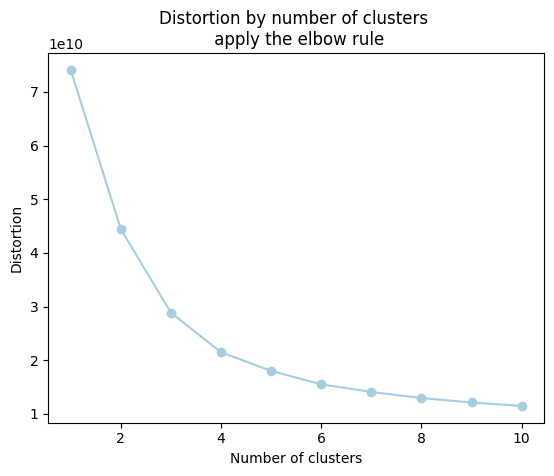

In [99]:
def plot_distortion(X_scaled,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Distortion by number of clusters \n apply the elbow rule')
    plt.show() 

plot_distortion(X,max_clusters=10)

The Kmeans algorithm seems to "turn the corner", so to speak (or display an elbow) around k = 4, quickly levelling off after that.  In other words, you may not be gaining much more out of using more than 4 clusters, so you get the best of a reasonably simple model at 4 clusters.

In [101]:
km4 = KMeans(n_clusters=4,n_init=10, random_state=0)
y_km4 = km4.fit(X_scaled)
y_km4

KMeans(n_clusters=4, n_init=10, random_state=0)

Below, either predict or labels will get you the cluster assignments.

In [102]:
km4.predict(X_scaled)

array([2, 2, 3, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 3,
       2, 0, 0, 0, 1, 3, 2, 0, 0, 3, 0, 0, 2, 1, 1, 3, 3, 2, 1, 1, 0, 1,
       1, 2, 1, 0, 0, 3, 1, 3, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 3, 3,
       3, 2, 3, 3, 1, 0, 0, 0, 1, 2, 0, 0, 3, 3, 0, 3, 1, 0, 0, 0, 0, 0,
       2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       2, 3, 3, 2, 0, 3, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 3, 3, 0, 1,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 0, 1, 0, 2, 3, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 3, 0, 0,
       1, 0, 3, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0,
       0, 0, 3, 0, 0, 0, 2, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3,
       0, 2, 2, 1, 0, 0, 0, 3, 0, 3, 2, 2, 3, 0, 0, 3, 3, 0, 3, 0, 0, 1,
       2, 1, 3, 1, 0, 0, 0, 0, 3, 0, 0, 3, 3, 2, 0, 2, 3, 3, 3, 0, 3, 0,
       3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 3,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0,

In [103]:
km4.labels_

array([2, 2, 3, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 3,
       2, 0, 0, 0, 1, 3, 2, 0, 0, 3, 0, 0, 2, 1, 1, 3, 3, 2, 1, 1, 0, 1,
       1, 2, 1, 0, 0, 3, 1, 3, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 3, 3,
       3, 2, 3, 3, 1, 0, 0, 0, 1, 2, 0, 0, 3, 3, 0, 3, 1, 0, 0, 0, 0, 0,
       2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       2, 3, 3, 2, 0, 3, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 3, 3, 0, 1,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 0, 1, 0, 2, 3, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 3, 0, 0,
       1, 0, 3, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0,
       0, 0, 3, 0, 0, 0, 2, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3,
       0, 2, 2, 1, 0, 0, 0, 3, 0, 3, 2, 2, 3, 0, 0, 3, 3, 0, 3, 0, 0, 1,
       2, 1, 3, 1, 0, 0, 0, 0, 3, 0, 0, 3, 3, 2, 0, 2, 3, 3, 3, 0, 3, 0,
       3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 3,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0,

Adding the cluster label to each row.

In [106]:
df_km4 = X_scaled.copy()
df_km4['km_cluster'] = km4.labels_
df_km4

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,km_cluster
0,0.157530,1.150833,0.143097,-0.874394,0.128160,0.131036,2
1,-0.379366,1.186704,0.459475,-0.242005,0.332651,0.529542,2
2,0.214549,-0.819709,-0.383411,1.654343,-0.587723,0.540460,3
3,1.109056,0.161835,0.085875,0.637538,-0.168170,3.631153,2
4,-0.153969,0.825438,-0.240750,-0.689743,-0.162223,0.233847,2
...,...,...,...,...,...,...,...
397,0.546139,-0.184757,0.211354,-0.680755,0.028062,-0.323879,0
398,2.698409,-0.764972,-0.928363,0.880607,-0.724490,1.048145,3
399,0.335666,2.509250,3.718625,-0.783294,4.147611,0.612336,1
400,-0.070067,-0.636864,-0.696952,-0.537773,-0.699714,0.847072,0


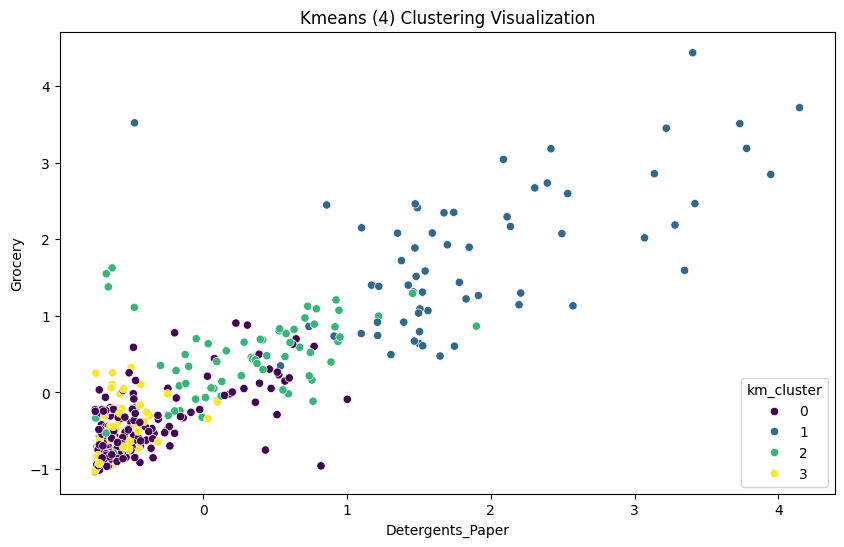

In [107]:
# Visualize the agglomerative (hierarchical) clusters using the principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Detergents_Paper', y='Grocery', hue='km_cluster', data=df_km4, palette='viridis', legend='full')
plt.title('Kmeans (4) Clustering Visualization')
plt.show()

Given more time, I'd be interested to see what this looks like using other features for the x and y axis, or, if I were to use the clusters derived from this Kmeans exercise and plot them using PC1 and PC2 obtained in Part IV (as it is, I plot the hierarchical clusters using PC1 and PC2 for the sake of example).

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [43]:
# define plot_dendrogram function
def plot_dendrogram(X_scaled,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X_scaled, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()


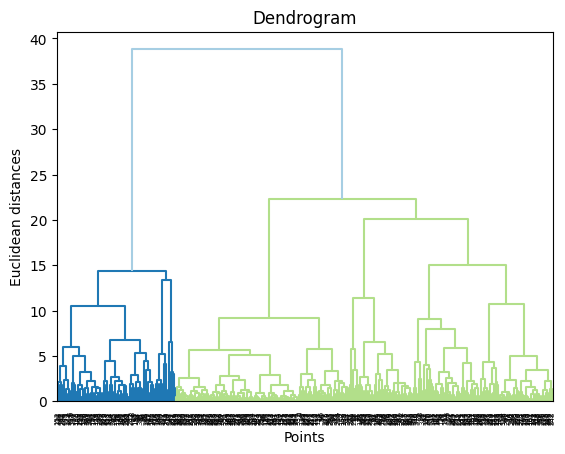

In [44]:
plot_dendrogram(X_scaled)

From the dendrogram above, we see the that longest vertical line that can be drawn without further agglomeration or division of clusters (I prefer to think of it as a horizontal band, undisturbed by new vertical lines from the dendrogram) crosses two vertical lines, indicating that 2 clusters may be the optimal number of clusters.

In [48]:
# Per the observations from the dendrogram, the optimal number of clusters is 2.

ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)

In [ ]:
y_hc = ac.fit_predict(X_scaled)

c:\Users\ron_d\anaconda3\envs\lhl_ds\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [52]:
X_scaled['acCluster'] = ac.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

This below won't run.  I can't recall what it was developed for.  I  see centroids, so presumably this was done for Kmeans, but I can see it applying to hierarchichal if the appropriate linkage is picked (the centroid one).  I took ward's, so not too sure how that renders.  Anyway, I couldn't get support from Larry because someone at LHL was busy messing with it so it wasn't working (like, it boots, but won't reply).  And mentors weren't on.  Given the other work that needs doing today I NEEDED to get this done in the morning.

In [51]:
# This only works if you have two features, which the tutorials often seem to stick to.  Meanwhile, back in the real world, you're dealing with more. 

def plot_clusters(x,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X_scaled[y_res == cluster,0]
        y = X_scaled[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()
    
plot_clusters(X_scaled,y_hc)

InvalidIndexError: (array([ True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
        True,  True,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True, False,
        True, False,  True,  True, False, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True, False,
        True,  True, False,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True]), 0)

Would the below work better?  It needs to be edited as it was created from doing t-SNE on kMeans results (3 clusters reduced to 2 for plotting, if I understood what I read in the AR I looked at).  

I just took to ChatGPT - since Larry and mentors weren't an option - and ended up producing a plot, after my edits, that uses the labels derived from this agglomerative clustering effort alongside the principal components identified in Part IV below.

In [ ]:
# Plot the clusters
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=df_tsne, palette='viridis', legend='full')
#plt.title('t-SNE Visualization of High-Dimensional Clusters')
#plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [ ]:
pca = PCA(n_components=None)
X_pca = pca.fit(X_scaled)

Produce a scree plot to identify those principal components that explain most of the variance.

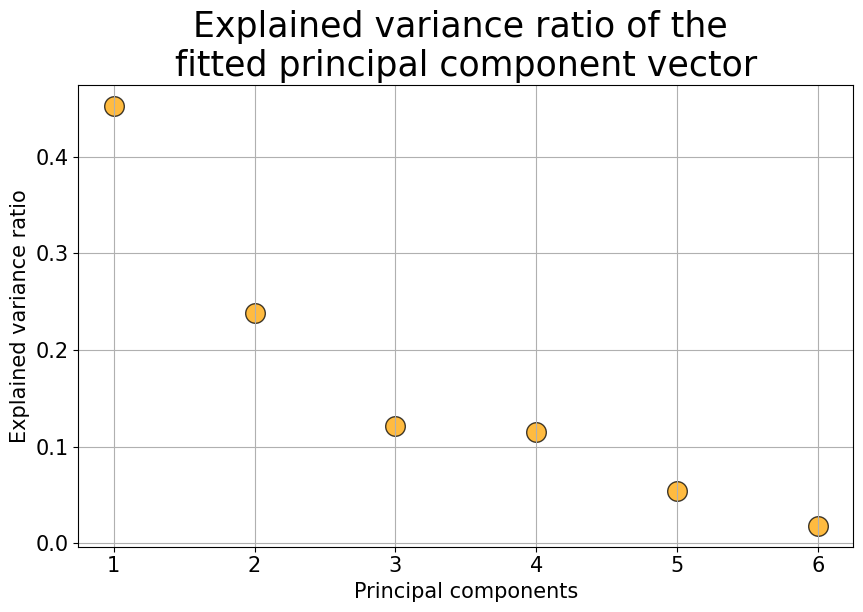

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(X_pca.explained_variance_ratio_))],
            y=X_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(X_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The first two components, PC1 and PC2, explain nearly 70% of the variance.  PC3 and PC4 each contribute another roughly 12%, while PC5 and PC6 only contribute about 5% and maybe 2%.  If I were to select which to use, I'd likely use PC1 and PC2 and go from there.

The below fits a PCA clustering model to 2 principal components per the above observations.

In [53]:
pca = PCA(n_components=2)
#X_pca = pca.fit(X_scaled)
X_pca = pca.fit_transform(X_scaled)

The below creates a dataframe that collects PC1 and PC2, and adds the clustering labels derived in the hierarchical clustering.  This was done to enable plotting the agglomerative clusters against 2 axes (for visualization's sake) and I felt that the PC1 and PC2 derived above provided a good basis on which to look at the clusters obtained in the hierarchical clustering model.

In [56]:
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca
df_pca['Cluster'] = ac.labels_   # hierarchical cluster labels derived in Part III above
df_pca

,PC1,PC2,Cluster
0,0.903563,-0.092654,0
1,1.267534,0.212933,1
2,-1.231762,1.188634,0
3,0.311658,3.184802,0
4,0.399241,-0.174502,0
...,...,...,...
397,0.008504,-0.286818,0
398,-1.843162,2.426163,0
399,5.896215,0.665906,1
400,-0.855379,0.045248,0


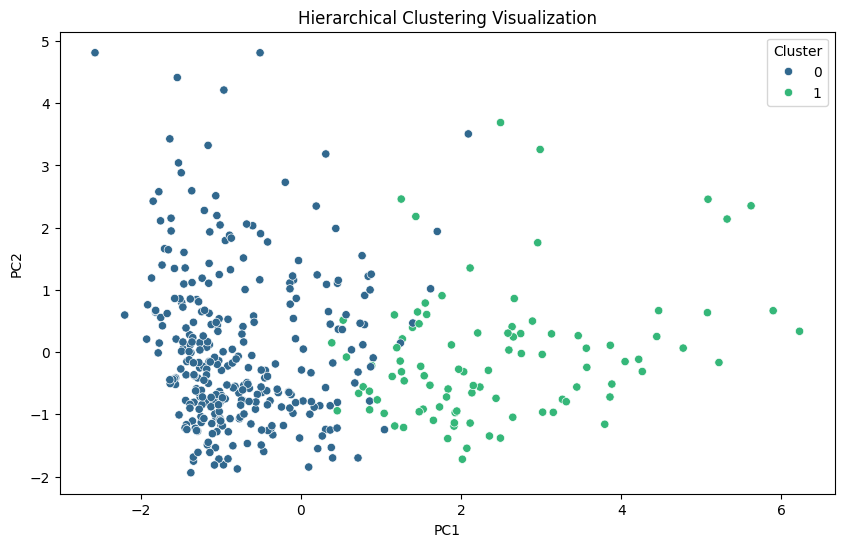

In [57]:
# Visualize the agglomerative (hierarchical) clusters using the principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', legend='full')
plt.title('Hierarchical Clustering Visualization')
plt.show()

Seems like a reasonably good separation of data.  Bit of blending in the middle, but otherwise shows promise.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

* The heatmap revealed that there may be correlation between:  
a) Grocery and Milk  
b) Milk and Detergents_Paper  
c) Detergents_Paper and Grocery  

>In fact, Detergents_Paper and Grocery have a correlation of 0.88, which is reasonably high.  There may be enough correlation to be concerned about aliasing (this is where two features are so correlated as to be nearly the same variable).  Is it possible that Grocery is largely made up of Detergents and Paper, as opposed to boxed and canned goods?  This warrants investigation with those who have gathered the data for this dataset.  

* Detergents_Paper and Grocery both had high F-scores in the SelectKBest results
* These same two features were the most important features shown using a RandomForestClassifier with GridSearch, suggesting they best distinguish between the classes for Channel, if one were interested in predicting Channel.  Given their high correlation, both should not be used as-is independently, certainly not in any algorithm that requires linearly independant features (logistic regression, for example).  It should sort itself out in a tree-based algorithm.
* PCA is good at handling correlated data, and produced two principal components that explained most of the variance.
* This is why, when I wanted to produce a plot showing how the agglomerative clustering classed the data, I opted to use the principal components, rather than directly use features - which would have me point to the two most "important" (but highly correlated) ones.  PCA seeemed like the way to go for identifying the axes for plotting clusters.  
* Further data investigation required:  *why* are Detergents_Paper and Grocery so correlated.  What products are tabulated under Grocery would be helpful.